In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [5]:
from src.models.instrumental_variable import get_covariances

get_covariances(instrument_prefix="weather_")

weather_tavg_lag0: -0.116
weather_tmin_lag0: 0.191
weather_tmax_lag0: -0.150
weather_prcp_lag0: -0.102
weather_snow_lag0: -0.149
weather_wspd_lag0: 0.489
weather_wpgt_lag0: 0.529
weather_pres_lag0: 0.805
weather_tsun_lag0: -1.016


cont                               bin            \
                      cov_w     cov_y          wald     cov_w     cov_y   
weather_tmin_lag0  0.007196  0.122098     16.966447  0.003568  0.044905   
weather_tavg_lag0  0.005044 -0.004635     -0.918894  0.003649 -0.009865   
weather_wspd_lag0 -0.004946 -0.475823     96.209843 -0.002560 -0.122810   
weather_snow_lag0 -0.004022 -0.197168     49.028452 -0.000988 -0.039882   
weather_wpgt_lag0 -0.003637 -0.373968    102.814500 -0.002579 -0.097116   
weather_tmax_lag0  0.003389 -0.065128    -19.218006  0.003038 -0.049028   
weather_pres_lag0 -0.002129  0.152524    -71.625450 -0.002306  0.034909   
weather_prcp_lag0  0.001964  0.148078     75.381395  0.001006  0.071345   
weather_tsun_lag0 -0.000008 -0.332245  44021.551793  0.001161  0.007952   

                              
                        wald  
weather_tmin_lag0  12.586974  
weather_tavg_lag0  -2.703669  
weather_wspd_lag0  47.965780  
weather_snow_lag0  40.356460  
weather_wpgt_lag0  37.658879  
weather_tmax_lag0 -16.136986  
weather_pres_lag0 -15.141292  
weather_prcp_lag0  70.894462  
weather_tsun_lag0   6.849487

In [6]:
get_covariances(instrument_prefix="covid_")

covid_retail_and_recreation_lag0: -1.292
covid_grocery_and_pharmacy_lag0: -0.804
covid_residential_lag0: 0.867
covid_transit_stations_lag0: -0.917
covid_parks_lag0: 0.104
covid_workplaces_lag0: -1.081
covid_stringency_index_lag0: -1.188


cont                             bin  \
                                     cov_w     cov_y        wald     cov_w   
covid_residential_lag0           -0.011946 -0.939287   78.625002 -0.004476   
covid_workplaces_lag0             0.011313  0.976248   86.294531  0.004088   
covid_transit_stations_lag0       0.008941  0.906486  101.381635  0.004861   
covid_retail_and_recreation_lag0  0.008934  0.907809  101.612331  0.003991   
covid_parks_lag0                  0.006398  0.078173   12.218777  0.005430   
covid_stringency_index_lag0      -0.004246 -0.842253  198.367356 -0.003030   
covid_grocery_and_pharmacy_lag0   0.003440  0.738980  214.816949  0.003783   

                                                       
                                     cov_y       wald  
covid_residential_lag0           -0.264951  59.199333  
covid_workplaces_lag0             0.227333  55.610752  
covid_transit_stations_lag0       0.276949  56.977099  
covid_retail_and_recreation_lag0  0.227847  57.093773  
covid_parks_lag0                  0.130744  24.080107  
covid_stringency_index_lag0      -0.226903  74.895362  
covid_grocery_and_pharmacy_lag0   0.288945  76.384275

In [1]:
from src.models.instrumental_variable import get_coefficients

get_coefficients("weather_")

,single,combi
,coef,coef
weather_tavg_lag0,0.003943,0.013798
weather_tmin_lag0,0.004243,0.010214
weather_tmax_lag0,0.003469,-0.025601
weather_prcp_lag0,0.000558,0.000748
weather_snow_lag0,-0.001292,-0.000130
weather_wspd_lag0,-0.002499,-0.004411
weather_wpgt_lag0,-0.001789,0.000727
weather_pres_lag0,-0.002007,-0.002958
weather_tsun_lag0,0.002878,0.009090


In [2]:
get_coefficients("covid_")

,single,combi
,coef,coef
covid_retail_and_recreation_lag0,0.001771,-0.002220
covid_grocery_and_pharmacy_lag0,-0.002979,-0.017295
covid_residential_lag0,-0.003995,-0.000504
covid_transit_stations_lag0,0.002295,-0.007121
covid_parks_lag0,0.004882,0.014226
covid_workplaces_lag0,0.002371,0.015260
covid_stringency_index_lag0,0.000414,-0.004694


In [2]:
from src.models.instrumental_variable import get_rf_params

rf1, rf2 = get_rf_params()
print(rf1, rf2)
print(rf1 == rf2)

{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
True


In [2]:
from src.models.instrumental_variable import check_for_improvement

results = check_for_improvement("weather_")
for clf, (a, b, p) in results.items():
    print(
        f"{clf}: {a.mean():.3f} ± {a.std():.3f} vs {b.mean():.3f} ± {b.std():.3f} -- t-test p={p:.3f}"
    )

LogisticRegression: 0.201 ± 0.057 vs 0.195 ± 0.057 -- t-test p=0.880
RandomForestClassifier: 0.219 ± 0.073 vs 0.213 ± 0.081 -- t-test p=0.761


In [4]:
results = check_for_improvement("covid_")
for clf, (a, b, p) in results.items():
    print(
        f"{clf}: {a.mean():.3f} ± {a.std():.3f} vs {b.mean():.3f} ± {b.std():.3f} -- t-test p={p:.3f}"
    )

LogisticRegression: 0.201 ± 0.057 vs 0.196 ± 0.058 -- t-test p=0.770
RandomForestClassifier: 0.221 ± 0.073 vs 0.189 ± 0.114 -- t-test p=0.973


  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

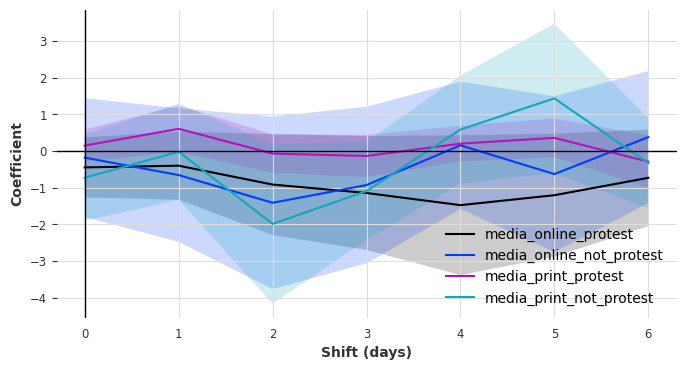

In [3]:
from src.models.time_series import instrumental_variable_liml, plot_impact_ts

_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instrument="weather_prcp",
    lags=range(-7, 1),
    ignore_group=True,
    n_jobs=1,
)
results
plot_impact_ts(results, "occ_protest")

  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

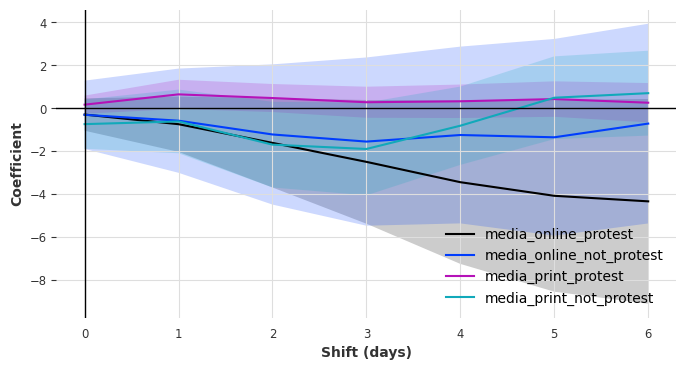

In [7]:
_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instrument="weather_prcp",
    lags=range(-7, 1),
    ignore_group=True,
    cumulative=True,
    n_jobs=1,
)
results
plot_impact_ts(results, "occ_protest")

  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

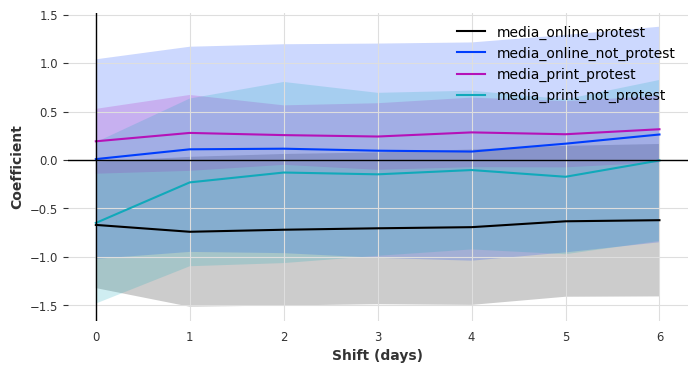

In [2]:
from src.models.time_series import instrumental_variable_liml, plot_impact_ts

_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instrument="covid_residential",
    lags=range(-7, 1),
    ignore_group=True,
    n_jobs=1,
)
results
plot_impact_ts(results, "occ_protest")

In [ ]:
# season-independent params

In [ ]:
# TODO: validation
# res.wooldridge_regression
# res.wooldridge_overid
# res.sargan